## Introduction to the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('dark')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [2]:
df18 = pd.read_csv('2018.csv', parse_dates=['Date'])
df18.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2018-04-19,HR,Zagreb,pm10,72,12.0,66.0,19.0,1034.64
1,2018-05-03,HR,Zagreb,pm10,72,5.0,46.0,20.0,740.53
2,2018-05-08,HR,Zagreb,pm10,69,7.0,33.0,17.0,286.35
3,2018-05-31,HR,Zagreb,pm10,48,15.0,60.0,25.0,704.61
4,2018-06-22,HR,Zagreb,pm10,62,1.0,60.0,7.0,670.06


In [3]:
df18['Specie'].unique()

array(['pm10', 'temperature', 'wind-speed', 'wind-gust', 'co', 'o3',
       'so2', 'no2', 'humidity', 'pressure', 'pm25', 'precipitation',
       'wd', 'd', 'uvi', 'aqi', 'pol', 'pm1', 'mepaqi'], dtype=object)

## Data Cleaning

### Data Cleaning 2018 DataFrame

In [4]:
df18 = pd.read_csv('2018.csv',parse_dates=['Date'])
df18.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2018-04-19,HR,Zagreb,pm10,72,12.0,66.0,19.0,1034.64
1,2018-05-03,HR,Zagreb,pm10,72,5.0,46.0,20.0,740.53
2,2018-05-08,HR,Zagreb,pm10,69,7.0,33.0,17.0,286.35
3,2018-05-31,HR,Zagreb,pm10,48,15.0,60.0,25.0,704.61
4,2018-06-22,HR,Zagreb,pm10,62,1.0,60.0,7.0,670.06


In [5]:
df18['City'].unique()

array(['Zagreb', 'Rijeka', 'Split', 'Stockholm', 'Göteborg', 'Malmö',
       'Uppsala', 'Pristina', 'São José dos Campos', 'São Paulo',
       'Hamilton', 'Calgary', 'Winnipeg', 'Halifax', 'Kitchener',
       'Edmonton', 'Surrey', 'Mississauga', 'Québec', 'Vancouver',
       'Victoria', 'Montréal', 'Toronto', 'Ottawa', 'London', 'Bogotá',
       'Medellín', 'Copenhagen', 'Las Palmas de Gran Canaria',
       'Salamanca', 'Barcelona', 'Donostia / San Sebastián',
       'Gasteiz / Vitoria', 'Córdoba', 'Valladolid', 'Santander', 'Palma',
       'Málaga', 'Sevilla', 'Bilbao', 'Pamplona', 'Castelló de la Plana',
       'Huelva', 'Granada', 'Madrid', 'Valencia', 'Burgos', 'Murcia',
       'Santa Cruz de Tenerife', 'Oviedo', 'Utrecht', 'Nijmegen',
       'Haarlem', 'Eindhoven', 'Rotterdam', 'Amsterdam', 'Dordrecht',
       'Breda', 'Groningen', 'Maastricht', 'The Hague', 'Abu Dhabi',
       'Dubai', 'Baguio', 'Manila', 'Butuan', 'Zamboanga', 'Cochabamba',
       'Nicosia', 'Limassol', 'Ḩawallī

#### Extracting and Cleaning Data from Chennai

In [6]:
chennai = df18[df18['City'] == 'Chennai']
chennai.head()

,Date,Country,City,Specie,count,min,max,median,variance
542590,2018-06-11,IN,Chennai,pressure,72,0.0,1005.0,0.0,2267540.0
542591,2018-05-19,IN,Chennai,pressure,69,0.0,1007.0,0.0,2325260.0
542592,2018-05-29,IN,Chennai,pressure,73,0.0,1003.0,0.0,2241080.0
542593,2018-05-24,IN,Chennai,pressure,71,0.0,1006.0,0.0,2291040.0
542594,2018-05-28,IN,Chennai,pressure,71,0.0,1016.6,0.0,2312180.0


In [7]:
chennai['Specie'].unique()

array(['pressure', 'co', 'o3', 'no2', 'humidity', 'wind-gust', 'so2',
       'pm25', 'wind-speed', 'temperature'], dtype=object)

In [8]:

pm = chennai[chennai['Specie'] == 'pm25'].copy() #So we don't modify the original
pm.head()

,Date,Country,City,Specie,count,min,max,median,variance
543455,2018-02-27,IN,Chennai,pm25,72,55.0,566.0,132.0,55623.8
543456,2018-05-10,IN,Chennai,pm25,63,11.0,241.0,56.0,13069.0
543457,2018-06-02,IN,Chennai,pm25,72,56.0,215.0,126.0,16094.4
543458,2018-03-22,IN,Chennai,pm25,86,21.0,199.0,103.0,13519.5
543459,2018-04-12,IN,Chennai,pm25,70,17.0,222.0,57.0,21815.9


In [9]:
#Pivot table
pm = pd.pivot_table(data=pm, values=['min', 'max', 'median'], index='Date')
pm.head()

,max,median,min
Date,,,
2018-01-01,180.0,129.0,56.0
2018-01-02,834.0,145.0,13.0
2018-01-03,781.0,135.0,40.0
2018-01-04,834.0,157.0,111.0
2018-01-05,327.0,156.0,129.0


In [10]:
pm.rename(columns={'min':'min_{}'.format('pm25'), 'max':'max_{}'.format('pm25'), 'median':'avg_{}'.format('pm25')}, inplace=True)
pm.head()

,max_pm25,avg_pm25,min_pm25
Date,,,
2018-01-01,180.0,129.0,56.0
2018-01-02,834.0,145.0,13.0
2018-01-03,781.0,135.0,40.0
2018-01-04,834.0,157.0,111.0
2018-01-05,327.0,156.0,129.0


After cleaning and transforming the data, we now know which steps the function has to contain. 

#### Writing a function to ease the cleaning process

In [11]:
def cleaning_function(df, city, parameters):
    #This function will make all the cleaning process
    #df is each DataFrame (df18, df19, df20)
    #City we will use
    #Parameters or environmental variables, we will take from each dataframe based
    #on it's available variables

    #Basic idea:
    #1. Extracts the city
    #2. From the list of parameters, extracts each parameter
    #3. From that parameter makes a pivot, and change columns names
    #4. Takes each parameter df and merges it with an empty df
    #5. Return that new DataFrame

    city_temp = df[df['City'] == city]
    city_temp_parameters = city_temp['Specie'].unique()
    final_df = pd.DataFrame()
    for parameter in parameters:
        if parameter not in city_temp_parameters:
            print("The parameter {} doesn't exist in the dataframe and will be ignored".format(parameter))
            continue
        else:
            temp_df = city_temp[city_temp['Specie'] == parameter].copy()
            temp_df_pivot = pd.pivot_table(data=temp_df, values=['min', 'max', 'median'], index='Date')
            temp_df_pivot.rename(columns={'min':'min_{}'.format(parameter), 'max':'max_{}'.format(parameter), 'median':'avg_{}'.format(parameter)}, inplace=True)
            final_df = pd.concat([final_df, temp_df_pivot], axis=1)
    return final_df

#### Extracting and Cleaning Data from Chennai

In [12]:
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
chennai_18 = cleaning_function(df18, 'Chennai', parameters)
chennai_18.head()

The parameter pm10 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,avg_o3,min_o3,max_so2,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,180.0,129.0,56.0,21.7,9.3,2.9,35.4,10.2,1.3,37.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,834.0,145.0,13.0,17.6,8.0,3.3,33.4,4.5,1.3,37.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,781.0,135.0,40.0,18.8,10.0,2.4,42.5,3.3,1.3,54.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,834.0,157.0,111.0,20.3,6.7,2.4,57.4,13.0,1.3,51.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,327.0,156.0,129.0,19.6,6.7,2.4,32.2,12.4,1.7,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
chennai_18.isnull().sum()

max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity       130
avg_humidity       130
min_humidity       130
max_pressure       135
avg_pressure       135
min_pressure       135
max_temperature    135
avg_temperature    135
min_temperature    135
max_wind-speed     130
avg_wind-speed     130
min_wind-speed     130
dtype: int64

In [14]:
chennai_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)

In [15]:
def missingvalue_function(city):
    city_noNan_foward = city.interpolate(method='linear',axis=1, limit_direction='forward')
    city_noNan_all = city_noNan_foward.interpolate(method='linear',axis=1,limit_direction='backward')
    #city_noNan_all.astype(int)
    return city_noNan_all

In [16]:
chennai_18 = missingvalue_function(chennai_18)
chennai_18.isnull().sum()

max_pm25    0
avg_pm25    0
min_pm25    0
max_co      0
avg_co      0
min_co      0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

#### Extracting and Cleaning Data from Mumbai

In [17]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
mumbai_18 = cleaning_function(df18, 'Mumbai', parameters)
mumbai_18.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,198.0,104.0,31.0,305.0,166.0,10.0,86.4,13.7,0.8,53.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,168.0,104.0,42.0,255.0,175.0,100.0,38.4,13.8,0.6,64.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,271.0,130.0,59.0,364.0,174.0,118.0,57.1,18.1,1.1,68.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,317.0,122.0,38.0,362.0,180.0,106.0,58.4,22.5,0.2,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,180.0,109.0,40.0,291.0,162.0,82.0,47.7,18.8,1.0,44.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
mumbai_18.isnull().sum()

max_pm10            11
avg_pm10            11
min_pm10            11
max_pm25             5
avg_pm25             5
min_pm25             5
max_co              11
avg_co              11
min_co              11
max_o3              72
avg_o3              72
min_o3              72
max_so2             11
avg_so2             11
min_so2             11
max_no2             72
avg_no2             72
min_no2             72
max_humidity       129
avg_humidity       129
min_humidity       129
max_pressure       129
avg_pressure       129
min_pressure       129
max_temperature    129
avg_temperature    129
min_temperature    129
max_wind-speed     135
avg_wind-speed     135
min_wind-speed     135
dtype: int64

In [19]:
mumbai_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)
mumbai_18 = missingvalue_function(mumbai_18)
mumbai_18.isnull().sum()

max_pm10    0
avg_pm10    0
min_pm10    0
max_pm25    0
avg_pm25    0
min_pm25    0
max_co      0
avg_co      0
min_co      0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

#### Extracting and Cleaning Data from Delhi

In [20]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
Delhi_18 = cleaning_function(df18, 'Delhi', parameters)
Delhi_18.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed,max_wd,avg_wd,min_wd
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,889.0,302.0,40.0,999.0,342.0,81.0,98.5,5.1,0.1,147.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,999.0,318.0,21.0,588.0,327.0,33.0,118.9,4.0,0.1,149.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,722.0,192.0,76.0,525.0,253.0,162.0,74.2,5.4,0.1,75.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,859.0,226.0,20.0,999.0,269.0,53.0,149.7,7.6,0.1,37.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,863.0,200.0,70.0,999.0,274.0,98.0,85.7,6.8,0.1,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
Delhi_18.isnull().sum()

max_pm10             0
avg_pm10             0
min_pm10             0
max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity       121
avg_humidity       121
min_humidity       121
max_pressure       121
avg_pressure       121
min_pressure       121
max_temperature    121
avg_temperature    121
min_temperature    121
max_wind-speed     120
avg_wind-speed     120
min_wind-speed     120
max_wd             133
avg_wd             133
min_wd             133
dtype: int64

In [22]:
Delhi_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed','max_wd','avg_wd','min_wd'], inplace=True)
Delhi_18 = missingvalue_function(Delhi_18)
Delhi_18.isnull().sum()

max_pm10    0
avg_pm10    0
min_pm10    0
max_pm25    0
avg_pm25    0
min_pm25    0
max_co      0
avg_co      0
min_co      0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

#### Extracting and Cleaning Data from Lucknow

In [23]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
lucknow_18 = cleaning_function(df18, 'Lucknow', parameters)
lucknow_18.head()

The parameter pm10 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,avg_o3,min_o3,max_so2,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,404.0,209.0,94.0,86.4,8.5,0.2,14.7,8.2,5.6,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,591.0,198.0,2.0,52.4,8.5,2.3,18.7,11.1,1.9,52.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,498.0,299.0,162.0,40.8,11.8,0.2,20.8,5.2,0.5,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,417.0,318.0,208.0,86.4,10.7,3.5,41.5,7.9,0.9,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,435.0,303.0,208.0,19.6,10.5,1.9,45.1,2.9,0.7,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
lucknow_18.isnull().sum()

max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity       130
avg_humidity       130
min_humidity       130
max_pressure       130
avg_pressure       130
min_pressure       130
max_temperature    130
avg_temperature    130
min_temperature    130
max_wind-speed     129
avg_wind-speed     129
min_wind-speed     129
dtype: int64

In [25]:
lucknow_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)


In [26]:
lucknow_18 = missingvalue_function(lucknow_18)
lucknow_18.isnull().sum()

max_pm25    0
avg_pm25    0
min_pm25    0
max_co      0
avg_co      0
min_co      0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

#### Extracting and Cleaning Data from Bangalore

In [27]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
bangalore_18 = cleaning_function(df18, 'Bengaluru', parameters)
bangalore_18.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,113.0,56.0,38.0,158.0,95.0,34.0,34.4,9.4,1.8,131.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,101.0,57.0,36.0,162.0,95.0,70.0,23.9,9.6,0.2,102.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,121.0,52.0,12.0,158.0,82.0,53.0,27.7,11.4,0.4,93.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,128.0,57.0,32.0,157.0,90.0,50.0,22.1,10.0,0.2,89.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,137.0,60.0,41.0,162.0,87.0,56.0,26.1,10.5,0.2,105.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
bangalore_18.isnull().sum()

max_pm10            72
avg_pm10            72
min_pm10            72
max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3              79
avg_o3              79
min_o3              79
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity       130
avg_humidity       130
min_humidity       130
max_pressure       130
avg_pressure       130
min_pressure       130
max_temperature    130
avg_temperature    130
min_temperature    130
max_wind-speed     130
avg_wind-speed     130
min_wind-speed     130
dtype: int64

In [29]:
bangalore_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)

In [30]:
bangalore_18 = missingvalue_function(bangalore_18)
bangalore_18.isnull().sum()

max_pm10    0
avg_pm10    0
min_pm10    0
max_pm25    0
avg_pm25    0
min_pm25    0
max_co      0
avg_co      0
min_co      0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

### Data Cleaning 2019 DataFrame

In [31]:
quarters = ['2019a.csv', '2019b.csv', '2019c.csv', '2019d.csv']

df19 = pd.DataFrame()
for quarter in quarters:
  df = pd.read_csv('{}'.format(quarter),parse_dates=['Date'])
  df19 = pd.concat([df19, df])

df19.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97


#### Extracting and Cleaning Data from Chennai (2019)

In [32]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
chennai_19 = cleaning_function(df19, 'Chennai', parameters)
chennai_19.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,191.0,132.0,61.0,72.2,8.0,2.3,43.0,...,31.7,1020.0,1017.5,1016.0,28.1,25.1,22.0,3.3,1.1,0.1
2019-01-01,NaN,NaN,NaN,834.0,135.0,51.0,28.2,7.2,2.3,46.5,...,27.1,1021.0,1018.0,1016.0,28.1,23.4,19.5,1.6,0.7,0.0
2019-01-02,NaN,NaN,NaN,201.0,117.0,44.0,34.1,7.9,2.3,40.9,...,30.3,1020.0,1018.0,1016.0,29.1,24.0,20.0,1.2,0.6,0.0
2019-01-03,NaN,NaN,NaN,263.0,161.0,72.0,24.5,9.4,2.2,46.6,...,31.7,1020.0,1018.0,1016.0,29.5,23.6,20.1,1.8,0.6,0.0
2019-01-04,NaN,NaN,NaN,311.0,153.0,23.0,28.7,6.6,2.3,40.2,...,33.4,1020.0,1017.0,1016.0,29.6,24.0,21.0,1.7,0.7,0.0


In [33]:
chennai_19.isnull().sum()

max_pm10           320
avg_pm10           320
min_pm10           320
max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               3
avg_o3               3
min_o3               3
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity         4
avg_humidity         4
min_humidity         4
max_pressure         4
avg_pressure         4
min_pressure         4
max_temperature      4
avg_temperature      4
min_temperature      4
max_wind-speed       4
avg_wind-speed       4
min_wind-speed       4
dtype: int64

In [34]:
chennai_19.drop(columns=['max_pm10', 'avg_pm10','min_pm10'], inplace=True)

In [35]:
chennai_19.isnull().sum()

max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             3
avg_o3             3
min_o3             3
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       4
avg_humidity       4
min_humidity       4
max_pressure       4
avg_pressure       4
min_pressure       4
max_temperature    4
avg_temperature    4
min_temperature    4
max_wind-speed     4
avg_wind-speed     4
min_wind-speed     4
dtype: int64

In [36]:
chennai_19 = missingvalue_function(chennai_19)
chennai_19.isnull().sum()

max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

#### Extracting and Cleaning Data from Mumbai (2019)

In [37]:
#Apply the function
#Check for missing data
#Fill missing data

parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
mumbai_19 = cleaning_function(df19, 'Mumbai', parameters)
mumbai_19.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,194.0,110.0,34.0,205.0,165.0,109.0,40.0,16.7,3.3,30.5,...,12.4,1020.0,1017.0,1015.0,32.9,24.6,14.1,4.8,0.6,0.0
2019-01-01,269.0,122.0,38.0,297.0,169.0,124.0,41.2,15.4,5.5,32.8,...,13.0,1019.5,1017.0,1015.0,33.4,24.1,13.7,5.1,0.5,0.0
2019-01-02,323.0,132.0,54.0,261.0,172.0,132.0,42.0,19.5,3.2,46.6,...,12.9,1019.0,1016.0,1014.0,34.5,23.7,14.1,4.6,0.4,0.0
2019-01-03,881.0,155.0,79.0,323.0,183.0,149.0,51.4,26.6,4.1,43.8,...,15.7,1020.0,1017.0,1015.0,34.2,24.1,15.0,4.1,0.5,0.0
2019-01-04,313.0,136.0,45.0,297.0,176.0,143.0,56.0,22.5,3.1,36.3,...,16.2,1018.0,1016.0,1014.0,36.0,24.9,15.5,4.8,0.5,0.0


In [38]:
mumbai_19.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       4
avg_humidity       4
min_humidity       4
max_pressure       4
avg_pressure       4
min_pressure       4
max_temperature    4
avg_temperature    4
min_temperature    4
max_wind-speed     4
avg_wind-speed     4
min_wind-speed     4
dtype: int64

In [39]:
mumbai_19 = missingvalue_function(mumbai_19)
mumbai_19.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

#### Extracting and Cleaning Data from Delhi (2019)

In [40]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
delhi_19 = cleaning_function(df19, 'Delhi', parameters)
delhi_19.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_precipitation,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed,max_wd,avg_wd,min_wd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,999.0,380.0,71.0,923.0,363.0,151.0,105.3,21.5,0.1,61.9,...,-2390.1,49.9,12.3,0.9,14.8,0.7,0.0,357.2,225.3,15.2
2019-01-01,999.0,354.0,91.0,898.0,341.0,95.0,116.8,17.6,0.1,77.8,...,-2072.1,48.1,13.0,1.0,6.9,0.6,0.0,351.5,211.4,0.0
2019-01-02,999.0,405.0,128.0,999.0,383.0,159.0,138.9,19.9,0.1,100.1,...,-2432.7,33.1,13.8,3.7,8.0,0.6,0.0,344.2,166.5,15.9
2019-01-03,999.0,421.0,111.0,999.0,410.0,70.0,133.8,18.5,0.1,69.0,...,-2995.8,33.0,13.0,4.3,7.7,1.0,0.0,350.0,232.0,9.4
2019-01-04,941.0,220.0,114.0,720.0,289.0,77.0,91.0,15.0,0.2,86.9,...,-2333.2,33.2,12.3,4.2,6.5,0.8,0.0,348.0,206.1,12.8


In [41]:
delhi_19.isnull().sum()

max_pm10               0
avg_pm10               0
min_pm10               0
max_pm25               0
avg_pm25               0
min_pm25               0
max_co                 0
avg_co                 0
min_co                 0
max_o3                 0
avg_o3                 0
min_o3                 0
max_so2                0
avg_so2                0
min_so2                0
max_no2                0
avg_no2                0
min_no2                0
max_humidity           0
avg_humidity           0
min_humidity           0
max_pressure           0
avg_pressure           0
min_pressure           0
max_precipitation    286
avg_precipitation    286
min_precipitation    286
max_temperature        0
avg_temperature        0
min_temperature        0
max_wind-speed         0
avg_wind-speed         0
min_wind-speed         0
max_wd                 4
avg_wd                 4
min_wd                 4
dtype: int64

In [42]:
delhi_19.drop(columns=['max_precipitation', 'avg_precipitation','min_precipitation'], inplace=True)

In [43]:
delhi_19 = missingvalue_function(delhi_19)
delhi_19.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
max_wd             0
avg_wd             0
min_wd             0
dtype: int64

#### Extracting and Cleaning Data from Lucknow (2019)

In [44]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
lucknow_19 = cleaning_function(df19, 'Lucknow', parameters)
lucknow_19.head()

The parameter pm10 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,avg_o3,min_o3,max_so2,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,581.0,256.0,162.0,35.0,6.7,0.4,48.0,7.8,1.0,49.1,...,36.3,1023.0,1020.0,1019.0,32.8,15.5,7.0,1.2,0.3,0.0
2019-01-01,581.0,305.0,171.0,34.0,6.5,0.5,48.8,6.5,1.0,49.0,...,30.2,1022.0,1020.0,1018.0,33.2,17.0,6.0,1.1,0.3,0.0
2019-01-02,625.0,397.0,42.0,38.8,9.2,0.1,56.0,4.1,0.8,41.8,...,32.0,1022.5,1019.5,1018.0,33.6,17.6,7.0,0.8,0.3,0.0
2019-01-03,535.0,252.0,152.0,60.1,7.0,0.4,46.8,7.3,0.7,25.1,...,44.0,1023.0,1020.0,1015.0,33.9,16.5,8.0,1.3,0.3,0.0
2019-01-04,551.0,259.0,15.0,35.5,7.7,0.7,34.4,7.6,0.5,21.2,...,31.3,1022.0,1020.0,1017.0,34.6,16.8,9.0,1.2,0.4,0.0


In [45]:
lucknow_19.isnull().sum()

max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       3
avg_humidity       3
min_humidity       3
max_pressure       3
avg_pressure       3
min_pressure       3
max_temperature    4
avg_temperature    4
min_temperature    4
max_wind-speed     3
avg_wind-speed     3
min_wind-speed     3
dtype: int64

In [46]:
lucknow_19 = missingvalue_function(lucknow_19)
lucknow_19.isnull().sum()

max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

#### Extracting and Cleaning Data from Bangalore (2019)

In [47]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
bangalore_19 = cleaning_function(df19, 'Bengaluru', parameters)
bangalore_19.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_pressure,max_precipitation,avg_precipitation,min_precipitation,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,167.0,72.0,40.0,834.0,148.0,2.0,39.5,6.7,1.0,94.4,...,913.0,NaN,NaN,NaN,30.3,23.8,15.0,3.6,1.6,0.1
2019-01-01,133.0,73.0,40.0,251.0,153.0,41.0,36.0,7.7,1.2,70.5,...,913.8,NaN,NaN,NaN,30.6,24.1,12.5,38.0,1.2,0.1
2019-01-02,131.0,65.0,30.0,186.0,112.0,3.0,35.9,7.0,0.9,59.3,...,913.5,NaN,NaN,NaN,35.2,24.2,11.0,6.9,1.5,0.2
2019-01-03,111.0,67.0,32.0,178.0,129.0,38.0,33.2,6.7,0.2,60.6,...,914.8,NaN,NaN,NaN,31.1,24.1,9.5,7.4,1.5,0.2
2019-01-04,135.0,70.0,40.0,188.0,123.0,35.0,36.0,7.8,0.1,47.2,...,913.5,NaN,NaN,NaN,37.7,24.3,8.5,6.4,1.2,0.0


In [48]:
bangalore_19.isnull().sum()

max_pm10               0
avg_pm10               0
min_pm10               0
max_pm25               0
avg_pm25               0
min_pm25               0
max_co                 0
avg_co                 0
min_co                 0
max_o3                 0
avg_o3                 0
min_o3                 0
max_so2                0
avg_so2                0
min_so2                0
max_no2                0
avg_no2                0
min_no2                0
max_humidity           4
avg_humidity           4
min_humidity           4
max_pressure           4
avg_pressure           4
min_pressure           4
max_precipitation    369
avg_precipitation    369
min_precipitation    369
max_temperature        4
avg_temperature        4
min_temperature        4
max_wind-speed         4
avg_wind-speed         4
min_wind-speed         4
dtype: int64

In [49]:
bangalore_19.drop(columns=['max_precipitation', 'avg_precipitation','min_precipitation'], inplace=True)

In [50]:
bangalore_19 = missingvalue_function(bangalore_19)
bangalore_19.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

### Data Cleaning 2020 DataFrame

In [51]:
df20 = pd.read_csv('2020.csv',parse_dates=['Date'])
df20.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2020-04-20,GR,Thessaloníki,pm25,47,21.0,68.0,53.0,1084.49
1,2020-07-24,GR,Thessaloníki,pm25,30,25.0,68.0,38.0,1246.54
2,2020-09-24,GR,Thessaloníki,pm25,47,13.0,76.0,38.0,3197.67
3,2020-01-30,GR,Thessaloníki,pm25,48,13.0,65.0,25.0,2094.45
4,2020-03-05,GR,Thessaloníki,pm25,44,5.0,61.0,25.0,2441.03


In [52]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
chennai_20 = cleaning_function(df20, 'Chennai', parameters)
chennai_20.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-30,60.0,42.0,25.0,173.0,111.0,21.0,10.9,4.0,2.6,30.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,69.0,51.0,32.0,167.0,107.0,6.0,15.7,3.9,2.5,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,63.0,33.0,16.0,157.0,68.0,7.0,9.7,3.9,2.1,17.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,38.0,19.0,6.0,180.0,63.0,4.0,14.0,4.0,2.7,15.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,53.0,28.0,18.0,167.0,72.0,14.0,86.3,3.9,2.6,23.0,...,61.7,1015.0,1008.8,760.6,31.0,28.7,26.3,7.2,1.6,0.0


#### Extracting and Cleaning Data from Chennai (2020)

In [53]:
chennai_20.isnull().sum()

max_pm10           92
avg_pm10           92
min_pm10           92
max_pm25            0
avg_pm25            0
min_pm25            0
max_co              0
avg_co              0
min_co              0
max_o3              1
avg_o3              1
min_o3              1
max_so2             0
avg_so2             0
min_so2             0
max_no2             0
avg_no2             0
min_no2             0
max_humidity       19
avg_humidity       19
min_humidity       19
max_pressure       19
avg_pressure       19
min_pressure       19
max_temperature    19
avg_temperature    19
min_temperature    19
max_wind-speed     88
avg_wind-speed     88
min_wind-speed     88
dtype: int64

In [54]:
chennai_20 = missingvalue_function(chennai_20)
chennai_20.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

#### Extracting and Cleaning Data from Mumbai (2020)

In [55]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
mumbai_20 = cleaning_function(df20, 'Mumbai', parameters)
mumbai_20.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-30,189.0,97.0,32.0,191.0,168.0,57.0,22.7,9.2,3.7,71.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,183.0,84.0,19.0,206.0,157.0,37.0,22.2,7.6,2.4,83.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,286.0,111.0,51.0,824.0,179.0,66.0,29.0,11.2,2.5,118.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,195.0,104.0,37.0,271.0,180.0,66.0,23.6,8.9,1.0,86.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,827.0,95.0,2.0,800.0,170.0,88.0,23.5,8.1,2.6,130.3,...,38.6,1016.5,1012.8,769.3,33.2,25.0,21.0,71.7,1.5,0.0


In [56]:
mumbai_20.isnull().sum()

max_pm10            0
avg_pm10            0
min_pm10            0
max_pm25            0
avg_pm25            0
min_pm25            0
max_co              0
avg_co              0
min_co              0
max_o3              0
avg_o3              0
min_o3              0
max_so2             0
avg_so2             0
min_so2             0
max_no2             0
avg_no2             0
min_no2             0
max_humidity       18
avg_humidity       18
min_humidity       18
max_pressure       19
avg_pressure       19
min_pressure       19
max_temperature    19
avg_temperature    19
min_temperature    19
max_wind-speed     88
avg_wind-speed     88
min_wind-speed     88
dtype: int64

In [57]:
mumbai_20 = missingvalue_function(mumbai_20)
mumbai_20.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

#### Extracting and Cleaning Data from Delhi (2020)

In [58]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
delhi_20 = cleaning_function(df20, 'Delhi', parameters)
delhi_20.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_precipitation,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed,max_wd,avg_wd,min_wd
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-30,825.0,353.0,25.0,678.0,356.0,43.0,61.6,19.1,0.1,77.9,...,NaN,6.3,6.2,5.5,2.2,2.1,1.5,NaN,NaN,NaN
2019-12-31,999.0,164.0,14.0,999.0,248.0,20.0,158.1,12.0,0.1,39.9,...,NaN,12.1,7.2,5.0,2.2,1.7,0.4,NaN,NaN,NaN
2020-01-01,999.0,342.0,20.0,999.0,392.0,102.0,148.2,22.6,0.1,153.1,...,NaN,16.8,10.6,4.2,2.6,0.8,0.5,NaN,NaN,NaN
2020-01-02,999.0,305.0,1.0,920.0,349.0,101.0,134.1,24.3,0.1,137.7,...,NaN,22.3,15.5,7.6,1.6,0.7,0.5,NaN,NaN,NaN
2020-01-03,999.0,187.0,3.0,729.0,255.0,65.0,85.5,20.3,0.1,199.2,...,NaN,34.8,18.3,7.4,9.9,0.9,0.1,336.4,159.8,25.8


In [59]:
delhi_20.isnull().sum()

max_pm10               0
avg_pm10               0
min_pm10               0
max_pm25               0
avg_pm25               0
min_pm25               0
max_co                 0
avg_co                 0
min_co                 0
max_o3                 0
avg_o3                 0
min_o3                 0
max_so2                0
avg_so2                0
min_so2                0
max_no2                0
avg_no2                0
min_no2                0
max_humidity          14
avg_humidity          14
min_humidity          14
max_pressure          14
avg_pressure          14
min_pressure          14
max_precipitation    211
avg_precipitation    211
min_precipitation    211
max_temperature       14
avg_temperature       14
min_temperature       14
max_wind-speed        84
avg_wind-speed        84
min_wind-speed        84
max_wd                18
avg_wd                18
min_wd                18
dtype: int64

In [60]:
delhi_20 = missingvalue_function(delhi_20)
delhi_20.isnull().sum()

max_pm10             0
avg_pm10             0
min_pm10             0
max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity         0
avg_humidity         0
min_humidity         0
max_pressure         0
avg_pressure         0
min_pressure         0
max_precipitation    0
avg_precipitation    0
min_precipitation    0
max_temperature      0
avg_temperature      0
min_temperature      0
max_wind-speed       0
avg_wind-speed       0
min_wind-speed       0
max_wd               0
avg_wd               0
min_wd               0
dtype: int64

In [61]:
delhi_20.describe()

,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_precipitation,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed,max_wd,avg_wd,min_wd
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,532.244681,88.333333,18.166667,411.606383,130.836879,24.734043,79.417021,8.171277,0.155319,163.599645,...,149.266135,39.119504,25.446099,5.627305,48.075887,44.849291,65.152128,322.403191,172.846809,11.590426
std,300.435959,44.311686,19.028651,222.926087,53.675727,28.565032,30.493547,2.939386,0.302404,90.975188,...,98.857947,18.581018,8.665972,9.032169,33.112426,75.998866,113.250182,84.934708,71.581432,10.766758
min,77.000000,23.000000,1.000000,137.000000,42.000000,1.000000,24.400000,4.400000,0.100000,39.900000,...,-1.000000,1.200000,1.200000,-52.000000,1.200000,0.400000,0.000000,0.400000,0.400000,0.100000
25%,253.250000,58.000000,3.000000,223.000000,89.250000,5.000000,65.075000,6.500000,0.100000,108.450000,...,1.050000,38.300000,21.025000,0.000000,24.350000,1.025000,0.100000,333.650000,124.200000,4.125000
50%,507.000000,80.000000,11.000000,348.000000,130.000000,12.000000,84.000000,7.300000,0.100000,140.200000,...,210.037500,40.000000,29.500000,4.800000,31.950000,1.400000,0.100000,348.600000,174.650000,8.200000
75%,824.500000,109.000000,25.000000,540.750000,159.750000,34.750000,85.900000,8.675000,0.100000,196.450000,...,212.318750,41.800000,31.000000,10.400000,88.375000,2.800000,2.100000,353.700000,238.225000,15.575000
max,999.000000,353.000000,88.000000,999.000000,392.000000,128.000000,322.800000,24.300000,4.700000,500.000000,...,405.500000,301.000000,36.500000,24.200000,123.900000,184.050000,271.050000,359.800000,276.200000,73.500000


#### Extracting and Cleaning Data from Lucknow (2020)

In [62]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
lucknow_20 = cleaning_function(df20, 'Lucknow', parameters)
lucknow_20.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-30,NaN,NaN,NaN,449.0,192.0,171.0,38.6,9.4,0.3,35.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,NaN,NaN,NaN,784.0,254.0,60.0,72.3,11.8,0.1,36.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,664.0,311.0,110.0,84.9,21.8,0.1,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,473.0,199.0,155.0,73.0,17.4,2.1,20.4,...,54.1,1013.6,1013.0,1011.5,NaN,NaN,NaN,0.4,0.2,0.0
2020-01-03,NaN,NaN,NaN,407.0,182.0,13.0,86.4,12.0,0.1,23.1,...,62.5,1016.6,1012.2,736.0,27.4,15.0,11.9,6.8,0.4,0.0


In [63]:
lucknow_20.isnull().sum()

max_pm10           193
avg_pm10           193
min_pm10           193
max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity        18
avg_humidity        18
min_humidity        18
max_pressure        18
avg_pressure        18
min_pressure        18
max_temperature     19
avg_temperature     19
min_temperature     19
max_wind-speed      87
avg_wind-speed      87
min_wind-speed      87
dtype: int64

In [64]:
lucknow_20 = missingvalue_function(lucknow_20)
lucknow_20.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

#### Extracting and Cleaning Data from Bangalore (2020)

In [65]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
bangalore_20 = cleaning_function(df20, 'Bengaluru', parameters)
bangalore_20.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-30,93.0,63.0,24.0,538.0,109.0,36.0,28.6,8.6,1.6,47.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,97.0,64.0,27.0,158.0,120.0,48.0,29.7,8.9,0.4,70.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,94.0,57.0,30.0,157.0,89.0,30.0,40.2,9.8,1.2,32.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,127.0,52.0,6.0,190.0,77.0,8.0,60.3,9.3,0.2,48.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,103.0,56.0,27.0,169.0,80.0,23.0,86.4,8.0,0.7,48.0,...,13.7,1019.5,725.2,713.0,37.3,26.5,17.4,11.2,1.0,0.3


In [66]:
bangalore_20.isnull().sum()

max_pm10            0
avg_pm10            0
min_pm10            0
max_pm25            0
avg_pm25            0
min_pm25            0
max_co              0
avg_co              0
min_co              0
max_o3              0
avg_o3              0
min_o3              0
max_so2             0
avg_so2             0
min_so2             0
max_no2             0
avg_no2             0
min_no2             0
max_humidity       18
avg_humidity       18
min_humidity       18
max_pressure       18
avg_pressure       18
min_pressure       18
max_temperature    18
avg_temperature    18
min_temperature    18
max_wind-speed     88
avg_wind-speed     88
min_wind-speed     88
dtype: int64

In [67]:
bangalore_20 = missingvalue_function(bangalore_20)
bangalore_20.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

## Data Analysis

Due to efficiency, we developed a plotting function, which unifies all the data frames and makes a plot for each pollutant. 

**AQI:** The Air Quality Index is a way to communicate to the public how polluted the air is or will be. It is an easier way to explain the air pollution level than using the common values, expressed in parts per million (ppm) or micrograms per cubic meter (μg/m3). However, there is not an unified way to calculate the AQI, because countries have different air regulations and air quality standards. The World Air Quality Project uses the 2016 US EPA Air Quality Index scale. This index is divided into six categories that indicate different levels of concern. 

In [68]:
def plotting_function(city_18, city_19, city_20, pollutants):
    #city_18, 19, 20 are the dataframes
    #pollutants is a list of the pollutants to plot
    #the pollutants should be written as "avg_pollutant"
    #lockdown_dates is a list of the lockdown dates to make the vertical line in 'month-day' format
    #lockdown_dates_name is a list of the names of each lockdown stage (stage might not be the best word :P)
    #BTW the vertical lines are limited to 3, in case we need more please let me know

    #Step 1: Joining the dataframes, selecting the period to analyze and extracting both month-day and year
    city_18 = city_18
    city_19 = city_19['2019-01-01':'2019-07-01']
    city_20 = city_20['2020-01-01':'2020-07-01']
    city_tot = pd.concat([city_18, city_19, city_20])
    city_tot['month_day'] =  city_tot.index.strftime('%m-%d')
    city_tot['year'] = city_tot.index.year

    #Step 2: Labeling, providing horizontal and vertical lines etc.
    for pollutant in pollutants:
        pol_name = pollutant.split('_')
        fig, ax = plt.subplots(figsize=(20, 5))
        ax = sns.lineplot(x='month_day', y=pollutant, data=city_tot, hue='year', palette="tab10")
        plt.xlabel('Date')
        plt.ylabel('AQI')
        plt.title('AQI for {} in 2018, 2019 and 2020'.format(pol_name[1].upper()), y=-0.3)
        plt.locator_params(axis='x', nbins=12)
        plt.xticks(rotation=90)
        ax.xaxis.set_major_locator(ticker.MaxNLocator(12))
        plt.legend(loc=2)

        if city_tot[pollutant].max() == 50:
            plt.axhline(50, c='g', linestyle='--')
        elif city_tot[pollutant].max() > 51 and city_tot[pollutant].max() <= 100:
            plt.axhline(50, c='g', linestyle='--')
            plt.axhline(100, c='y', linestyle='--')
        elif city_tot[pollutant].max() > 101 and city_tot[pollutant].max() <= 150:
            plt.axhline(50, c='g', linestyle='--')
            plt.axhline(100, c='y', linestyle='--')
            plt.axhline(100, c='orange', linestyle='--')
        elif city_tot[pollutant].max() > 151 and city_tot[pollutant].max() <= 200:
            plt.axhline(50, c='g', linestyle='--')
            plt.axhline(100, c='y', linestyle='--')
            plt.axhline(150, c='red', linestyle='--')
            

<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)


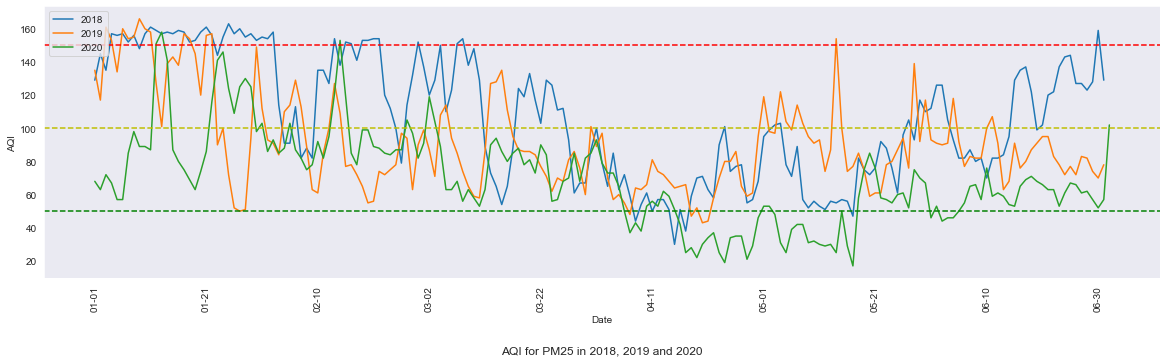

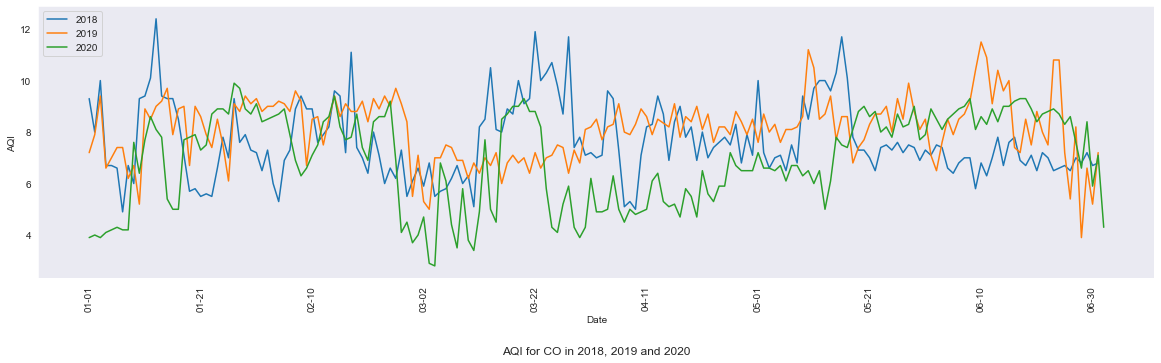

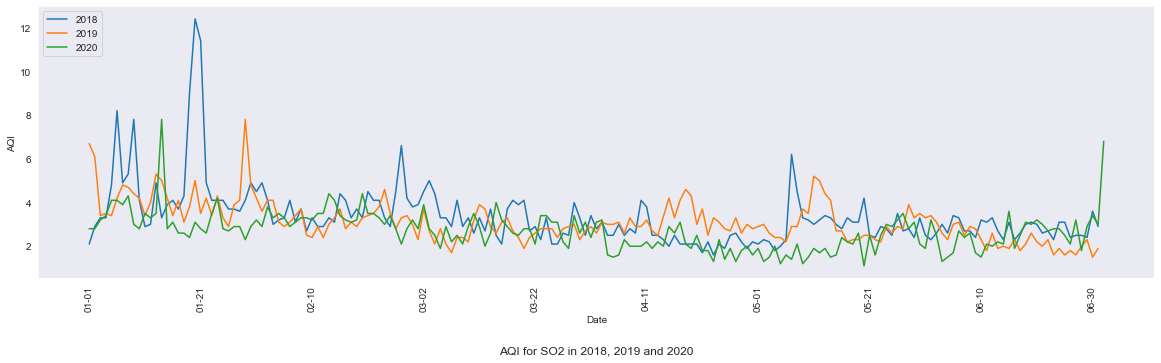

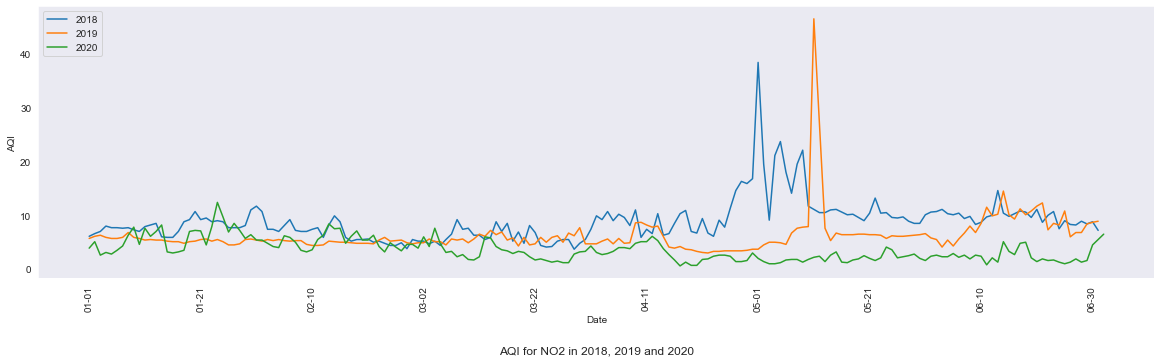

In [69]:
plotting_function(chennai_18, chennai_19, chennai_20, ['avg_pm25', 'avg_co', 'avg_so2', 'avg_no2'])

### Data Analysis Mumbai

<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)


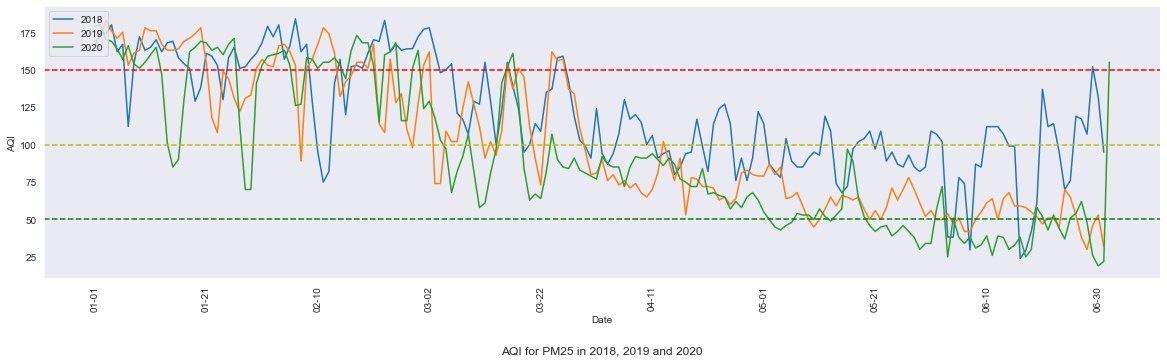

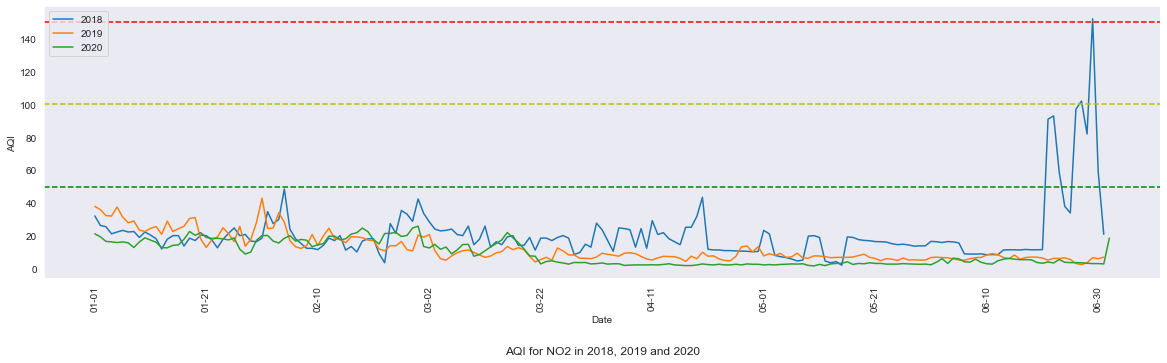

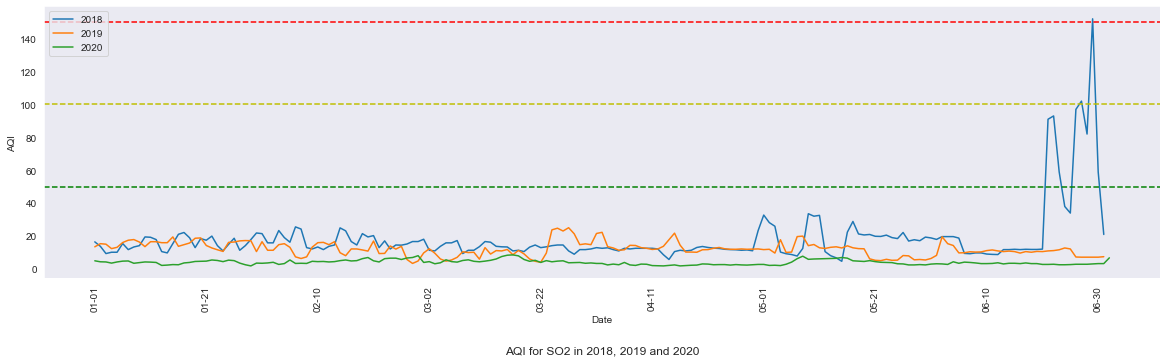

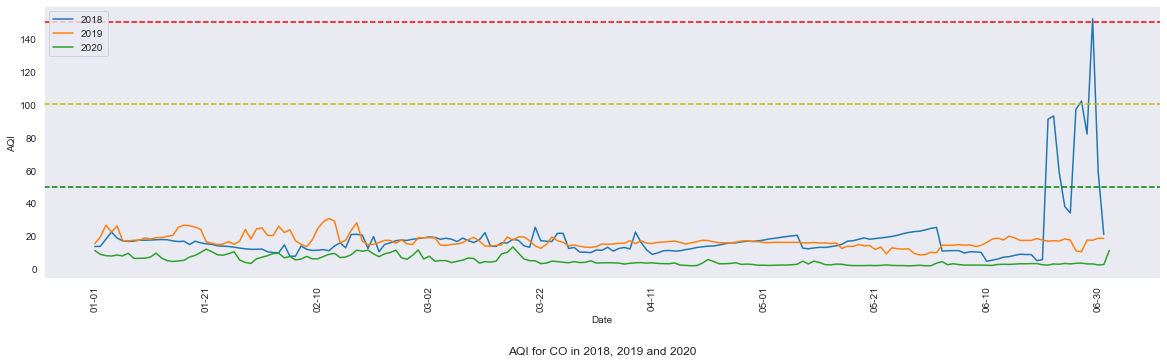

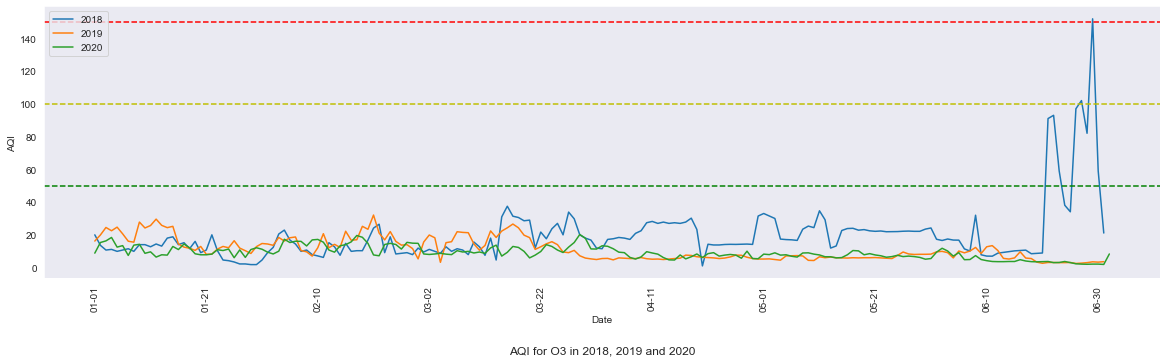

In [70]:
plotting_function(mumbai_18, mumbai_19, mumbai_20, ['avg_pm25','avg_no2', 'avg_so2', 'avg_co', 'avg_o3'])

### Data Analysis Lucknow

<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)


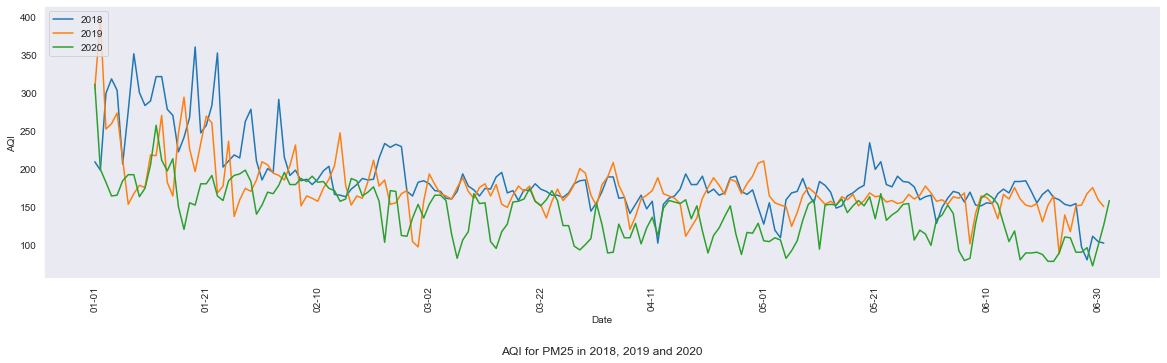

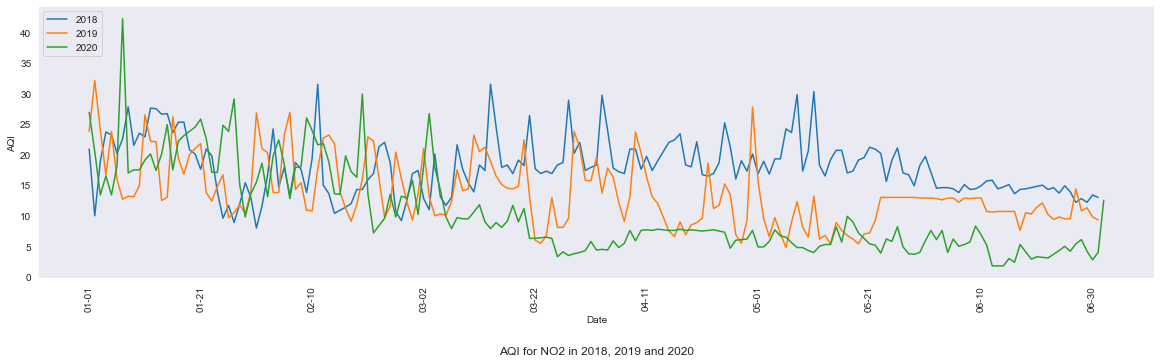

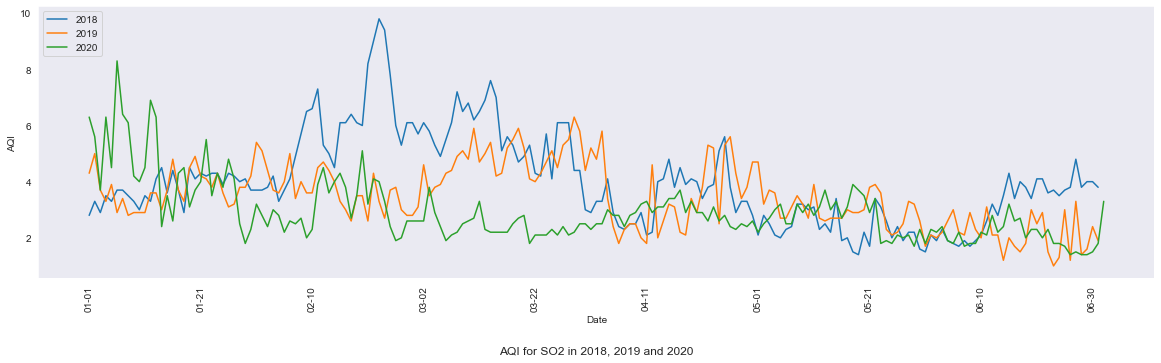

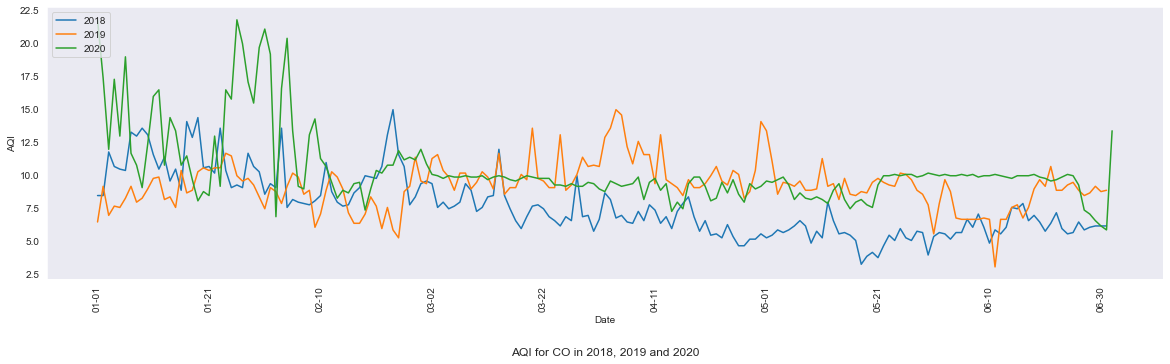

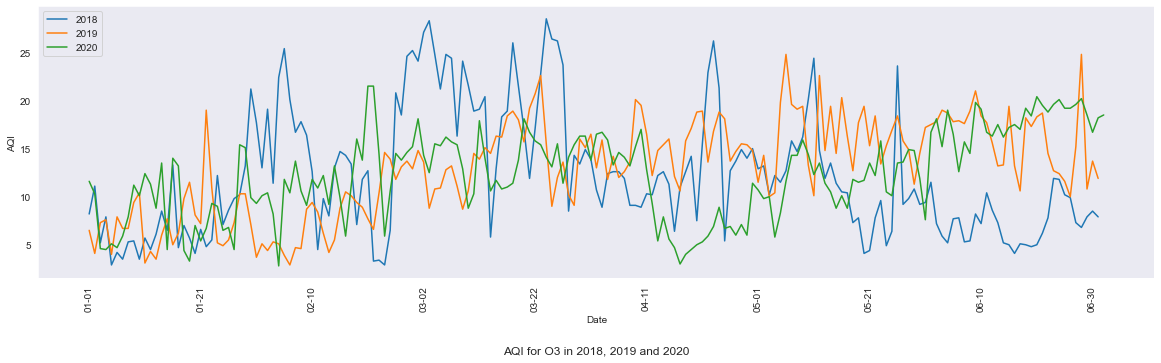

In [71]:
plotting_function(lucknow_18, lucknow_19, lucknow_20, ['avg_pm25', 'avg_no2', 'avg_so2', 'avg_co', 'avg_o3'])

### Data Analysis Delhi

<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not de

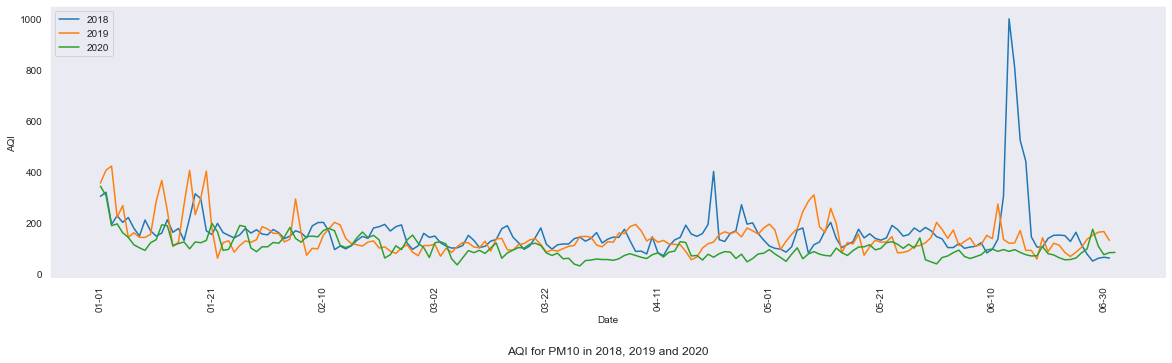

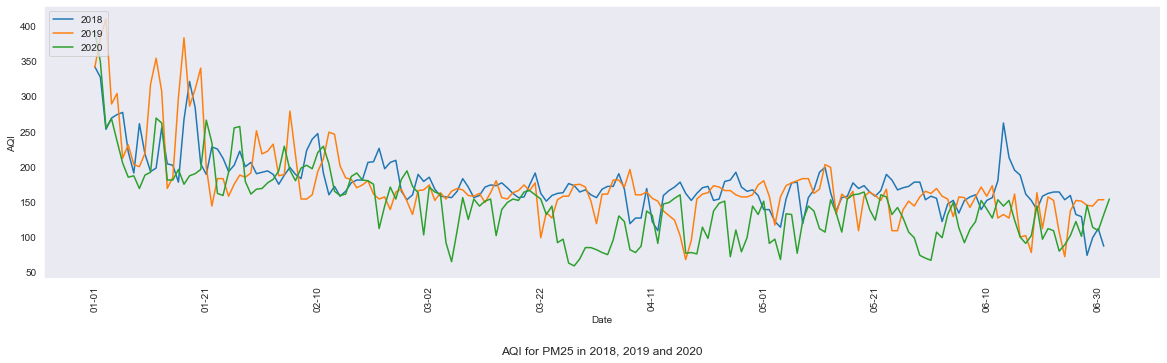

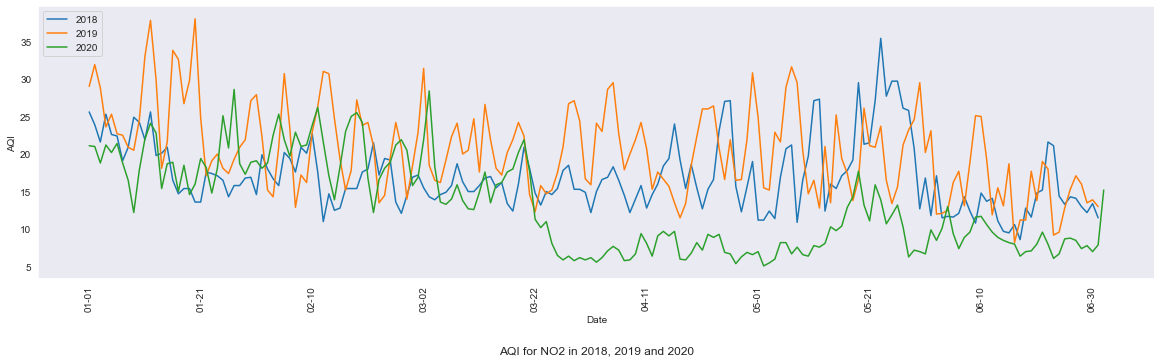

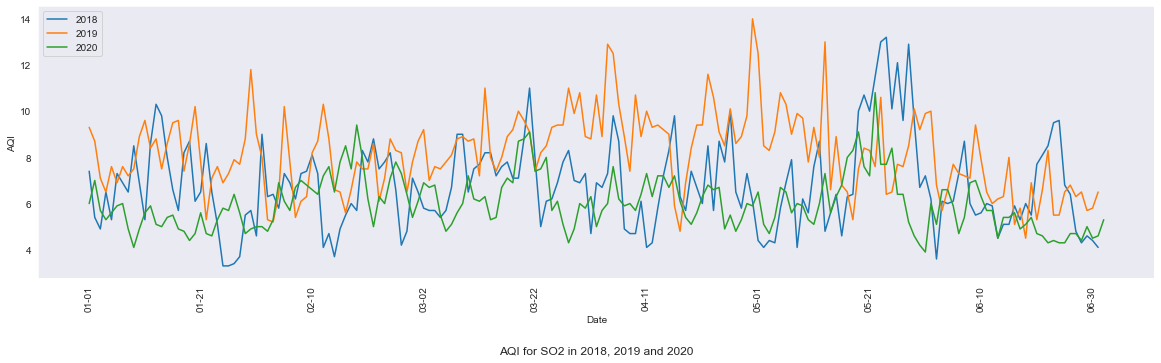

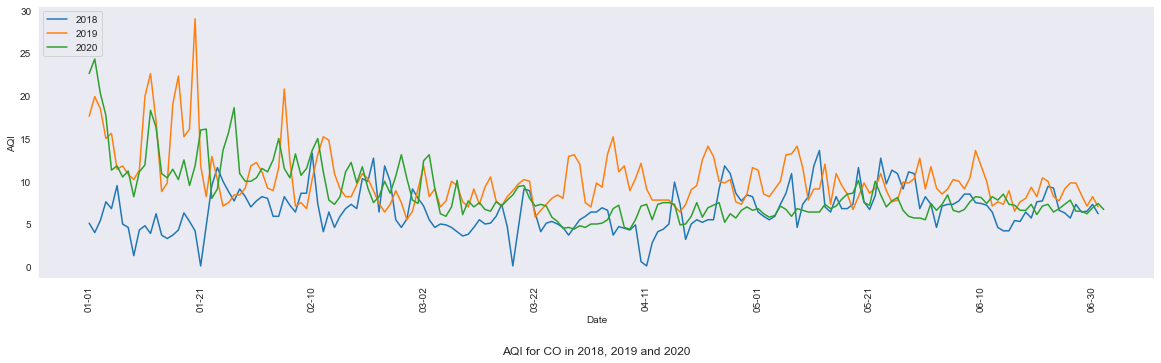

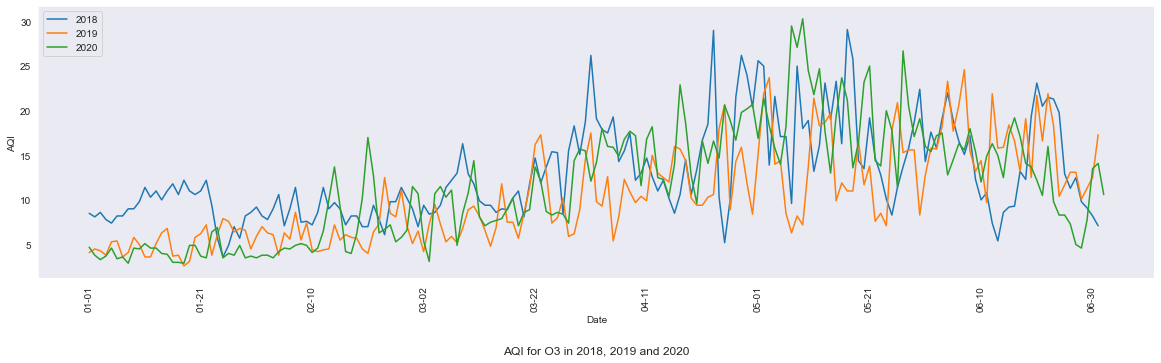

In [72]:
plotting_function(Delhi_18, delhi_19,delhi_20, ['avg_pm10', 'avg_pm25', 'avg_no2', 'avg_so2', 'avg_co', 'avg_o3'])

### Data Analysis Bangalore

<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)
<ipython-input-68-0518a649a6b5>:25: UserWarning: 'set_params()' not de

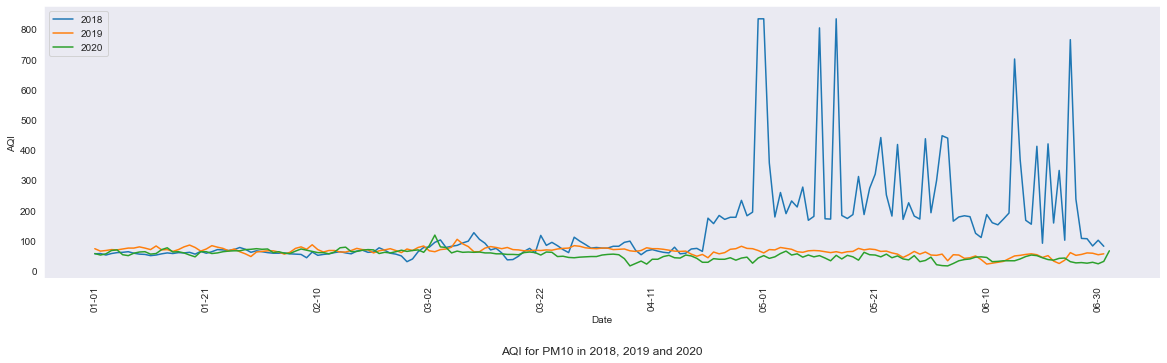

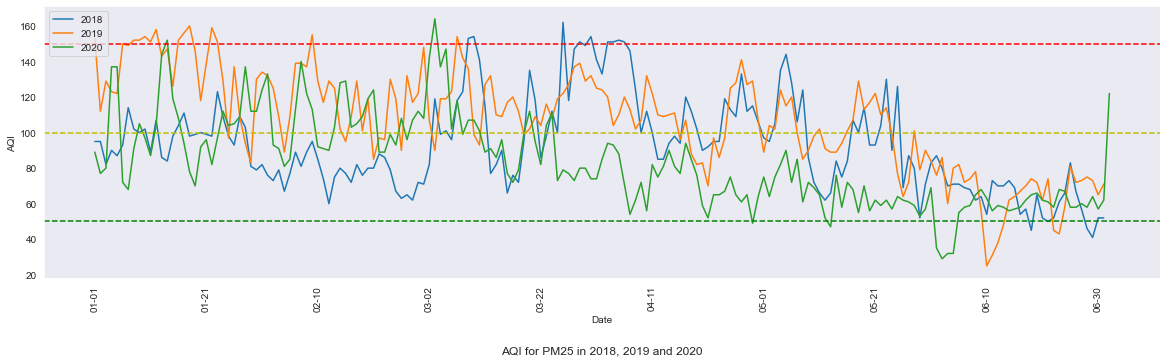

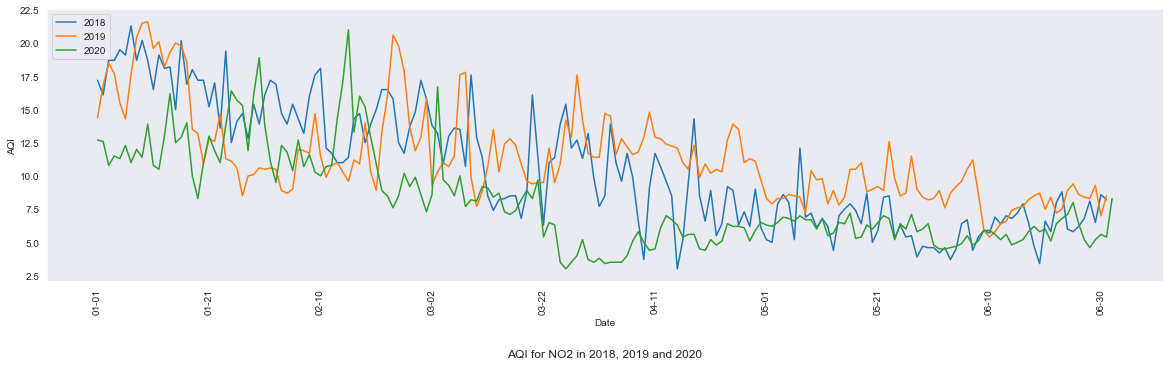

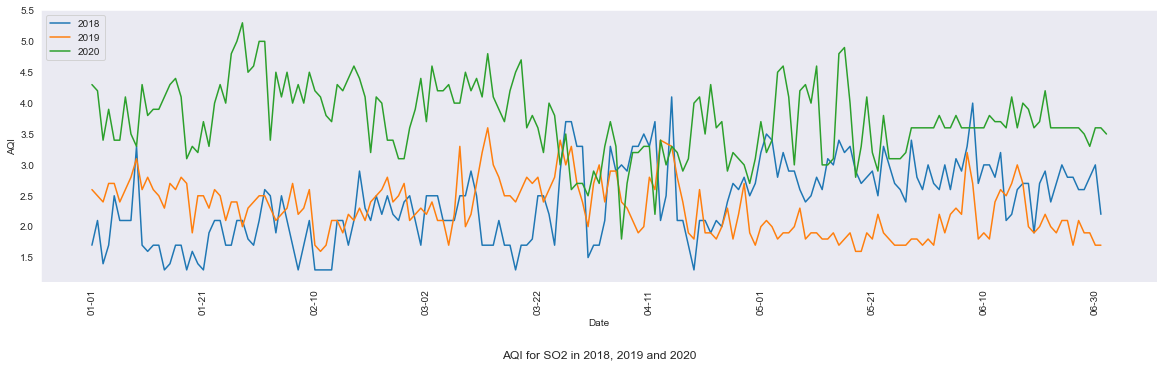

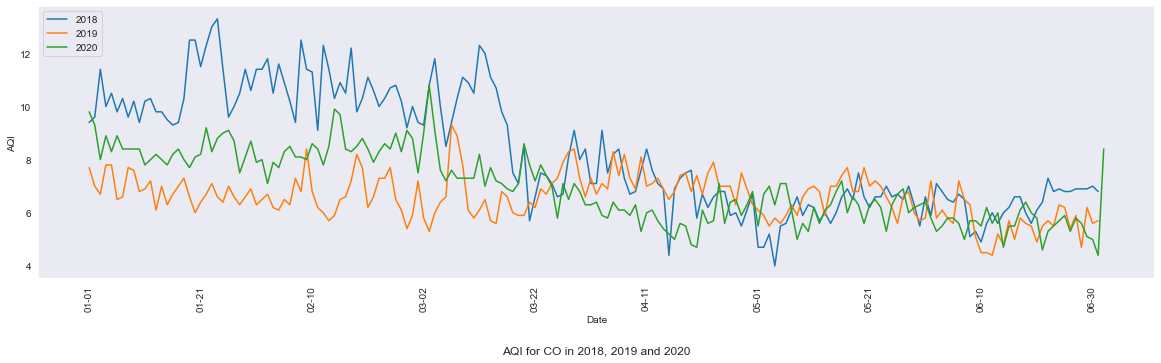

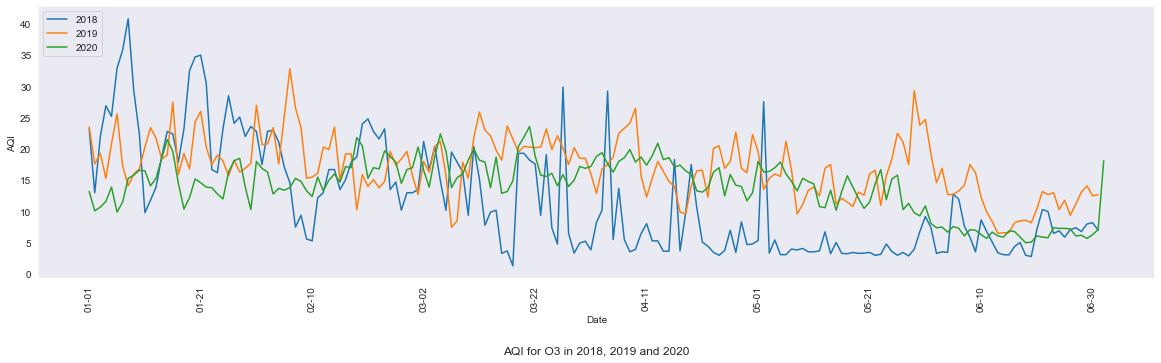

In [73]:
plotting_function(bangalore_18, bangalore_19,bangalore_20, ['avg_pm10', 'avg_pm25', 'avg_no2', 'avg_so2', 'avg_co', 'avg_o3'])

## Predictions

### Random Forest

Random forest is one of the best ml algorithm,it takes less training time as compared to other algorithms.We have used it for making the AQI prediction using the parameters: **City**, **Average humidity**, **Minimum Temperature**, **Maximum Temperature**, **Wind Speed**, **Average (Maximum) precipitation**. Some cities doesn't have data about precipitation, in that case the value for precipitation is 0 and the function was written to avoid that feature. So it prints the predicted value and recomendations for each AQI level.

In [74]:
#AQI recomendations
def aqi_status(pred):
    if pred <= 50:
        print("AQI of {:.0f}, The air quality is good".format(pred[0]))
    elif pred > 50 and pred <= 100:
        print("""AQI of {:.0f}, The air quality reached the second level moderate. 
        Help influencing the quality for the next days by using public transportations, bike etc and take only necessary rides. 
        To minimize your own health risk don´t do sports outside.If you have a respiratory or other air sensitive diseases stay 
        inside if possible or maybe wear a facemask outside.""".format(pred[0]))
    elif pred > 100 and pred <= 150:
        print("""AQI of {:.0f}, The air quality is unhealthy for sensitive groups! 
        Help influencing the quality for the next days by using public transportations, shared mobility, homeoffice etc. 
        For your own health stay inside if possible and maybe invest in air purifiers. 
        Don´t do sports outside. If you have a respiratory or other air sensitive diseases: This air is unhealty for you. 
        Stay inside, run air purifying systems and wear a facemask outside.""".format(pred[0]))
    elif pred > 150 and pred <= 200:
        print("""AQI of {:.0f}, This air is unhealthy! 
        Stay as much inside as possible and run air purifying systems. 
        Wear facemasks if you need to go outside and reduce your time outside to a minimum.""".format(pred[0]))
    elif pred > 200 and pred <= 300:
        print("""AQI of {:.0f}, This air is very unhealthy! 
        Stay inside and run air purifiying systems. 
        Wear a facemask and don´t go outside if not absolutly necessary.""".format(pred[0]))
    elif pred > 300 and pred <= 400:
        print("""AQI of {:.0f}, This air is hazardous! Stay inside and run air purifiying systems.""".format(pred[0]))
    elif pred > 400 and pred <= 500:
        print("""AQI of {:.0f}, This air is hazardous! Stay inside and run air purifiying systems.""".format(pred[0]))


#Predictions
def predictor(city, pollutant, avg_humidity, min_temp, max_temp, avg_ws, avg_prec, date):
    #city: city to predict
    #pollutant: to predict in avg_pollutant format
    #it's possible to predict another pollutant different than pm2.5, unless we did not have data
    #avg_humidity: Average humidity
    #min_temp: Minimum temperature predicted
    #max_temp: Maximum temperature predicted
    #avg_ws: Average wind speed predicted
    #avg_prec: Average precipitation or max precipitation
    #In case there's no data about precipitation use 0 and the model will not use it
    #date: date of prediction
   

    if city == 'Chennai':
        city_tot = pd.concat([chennai_19, chennai_20])
        x_train = city_tot[['avg_humidity', 'min_temperature', 'max_temperature' ,'avg_wind-speed']]
        y_train = city_tot[pollutant]

        model = RandomForestRegressor(n_estimators=90, min_samples_split=70, min_samples_leaf=10, max_features='sqrt', max_depth=20, bootstrap=True, random_state=42)
        model.fit(x_train, y_train)

        weather_values = {'avg_humidity': avg_humidity, 'min_temperature':min_temp, 'max_temperature':max_temp,
        'avg_wind-speed':avg_ws}
        tomorrow_df = pd.DataFrame(data=weather_values, index=[date])
        pred = model.predict(tomorrow_df)
        aqi_status(pred)
    
    elif city == 'Mumbai':
        city_tot = pd.concat([mumbai_19, mumbai_20])
        x_train = city_tot[['avg_humidity', 'min_temperature', 'max_temperature' ,'avg_wind-speed']]
        y_train = city_tot[pollutant]

        model = RandomForestRegressor(n_estimators=150, min_samples_split=70, min_samples_leaf=5, max_features='sqrt', max_depth=70, bootstrap=False, random_state=42)
        model.fit(x_train, y_train)

        weather_values = {'avg_humidity': avg_humidity, 'min_temperature':min_temp, 'max_temperature':max_temp,
        'avg_wind-speed':avg_ws}
        tomorrow_df = pd.DataFrame(data=weather_values, index=[date])
        pred = model.predict(tomorrow_df)
        aqi_status(pred)

    elif city == 'Delhi':
        city_tot = pd.concat([delhi_19, delhi_20])
        x_train = city_tot[['avg_humidity', 'min_temperature', 'max_temperature' ,'avg_wind-speed']]
        y_train = city_tot[pollutant]

        model = RandomForestRegressor(n_estimators=90, min_samples_split=70, min_samples_leaf=10, max_features='sqrt', max_depth=20, bootstrap=True, random_state=42)
        model.fit(x_train, y_train)

        weather_values = {'avg_humidity': avg_humidity, 'min_temperature':min_temp, 'max_temperature':max_temp,
        'avg_wind-speed':avg_ws}
        tomorrow_df = pd.DataFrame(data=weather_values, index=[date])
        pred = model.predict(tomorrow_df)
        aqi_status(pred)

    elif city == 'Lucknow':
        city_tot = pd.concat([lucknow_19, lucknow_20])
        x_train = city_tot[['avg_humidity', 'min_temperature', 'max_temperature' ,'avg_wind-speed']]
        y_train = city_tot[pollutant]

        model = RandomForestRegressor(n_estimators=90, min_samples_split=70, min_samples_leaf=10, max_features='sqrt', max_depth=20, bootstrap=True, random_state=42)
        model.fit(x_train, y_train)

        weather_values = {'avg_humidity': avg_humidity, 'min_temperature':min_temp, 'max_temperature':max_temp,
        'avg_wind-speed':avg_ws}
        tomorrow_df = pd.DataFrame(data=weather_values, index=[date])
        pred = model.predict(tomorrow_df)
        aqi_status(pred)

    elif city == 'Bengaluru':
        city_tot = pd.concat([bangalore_19,bangalore_20])
        x_train = city_tot[['avg_humidity', 'min_temperature', 'max_temperature' ,'avg_wind-speed']]
        y_train = city_tot[pollutant]

        model = RandomForestRegressor(n_estimators=90, min_samples_split=70, min_samples_leaf=10, max_features='sqrt', max_depth=20, bootstrap=True, random_state=42)
        model.fit(x_train, y_train)

        weather_values = {'avg_humidity': avg_humidity, 'min_temperature':min_temp, 'max_temperature':max_temp,
        'avg_wind-speed':avg_ws}
        tomorrow_df = pd.DataFrame(data=weather_values, index=[date])
        pred = model.predict(tomorrow_df)
        aqi_status(pred)
        

    

### Prediction for Chennai

In [75]:

#Chennai prediction 
predictor('Chennai', 'avg_pm25', 64, 12, 20, 5, 0, '2020-24-10')

AQI of 91, The air quality reached the second level moderate. 
        Help influencing the quality for the next days by using public transportations, bike etc and take only necessary rides. 
        To minimize your own health risk don´t do sports outside.If you have a respiratory or other air sensitive diseases stay 
        inside if possible or maybe wear a facemask outside.


### Prediction for Mumbai

In [85]:

#Mumbai prediction 
predictor('Mumbai', 'avg_pm25', 75, 10, 57, 15, 2, '2020-24-10')

AQI of 100, The air quality is unhealthy for sensitive groups! 
        Help influencing the quality for the next days by using public transportations, shared mobility, homeoffice etc. 
        For your own health stay inside if possible and maybe invest in air purifiers. 
        Don´t do sports outside. If you have a respiratory or other air sensitive diseases: This air is unhealty for you. 
        Stay inside, run air purifying systems and wear a facemask outside.


### Prediction for Delhi

In [77]:

#Delhi prediction 
predictor('Delhi', 'avg_pm25', 64, 12, 20, 5, 0, '2020-24-10')

AQI of 185, This air is unhealthy! 
        Stay as much inside as possible and run air purifying systems. 
        Wear facemasks if you need to go outside and reduce your time outside to a minimum.


### Prediction for Lucknow

In [78]:

#Lucknow prediction
predictor('Lucknow', 'avg_pm25', 64, 12, 20, 5, 0, '2020-24-10')

AQI of 185, This air is unhealthy! 
        Stay as much inside as possible and run air purifying systems. 
        Wear facemasks if you need to go outside and reduce your time outside to a minimum.


### Prediction for Bangalore

In [79]:

#Bangalore prediction 
predictor('Bengaluru', 'avg_pm25', 64, 12, 20, 5, 0, '2020-24-10')

AQI of 104, The air quality is unhealthy for sensitive groups! 
        Help influencing the quality for the next days by using public transportations, shared mobility, homeoffice etc. 
        For your own health stay inside if possible and maybe invest in air purifiers. 
        Don´t do sports outside. If you have a respiratory or other air sensitive diseases: This air is unhealty for you. 
        Stay inside, run air purifying systems and wear a facemask outside.
